<a href="https://colab.research.google.com/github/Maheep27/Data-Science-job-market-in-US-/blob/main/alldata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving alldata.csv to alldata.csv


In [5]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [37]:
import pandas as pd
import re
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import numpy as np
import seaborn as sns

pandas for dataframe

numpy for array

string for string handling

seaborn and matplotlib for ploting graph

lemmatization uses the context in which the word is being used


In [17]:
df=pd.read_csv("alldata.csv")

In [18]:
df

,position,company,description,reviews,location
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,"Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",NaN,"Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA"
...,...,...,...,...,...
6959,Data Developer / Machine Learning Analyst,NetApp,Are you data-driven? We at NetApp believe in t...,574.0,"Sunnyvale, CA"
6960,Scientist I,"Pharmacyclics, an Abbvie Company",Pharmacyclics is committed to the development ...,26.0,"Sunnyvale, CA"
6961,Intern Scientist,Oath Inc,"Oath, a subsidiary of Verizon, is a values-led...",5.0,"Sunnyvale, CA"
6962,Senior Data & Applied Scientist,Microsoft,We are the Bing Core Relevance team responsibl...,4618.0,"Sunnyvale, CA"


In [24]:
df.drop(columns = 'reviews',inplace = True)

drop review column from given dataset

In [25]:
df.isnull().sum()

position       11
company        11
description    11
location       11
dtype: int64

To check is there any null value in dataset. all column conatin 11 null values.

In [31]:
df.drop(index = df[df['position'].isnull()].index, inplace = True)

drop all 11 null values corresponding to position column

In [35]:
df['city'] = df.location.apply(lambda x: x.split(',')[0].strip())
df['state'] = df.location.apply(lambda x: x.split(',')[1].strip())
df.head()

,position,company,description,location,city,state
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,"Atlanta, GA",Atlanta,GA
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...","Atlanta, GA",Atlanta,GA
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...","Atlanta, GA",Atlanta,GA
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,"Atlanta, GA",Atlanta,GA
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,"Atlanta, GA",Atlanta,GA


make two columns city and state from loaction column by spliting (,) 0 index used for city and 1 index used for state

Positions by Job Title

plot number of position corresponding to each designation in largest 40 company

x-axis correspond to different types of designation

y-axis correspond to number of position corresponding to each designaion in top 40 companies

Text(0.5, 0, 'Designation')

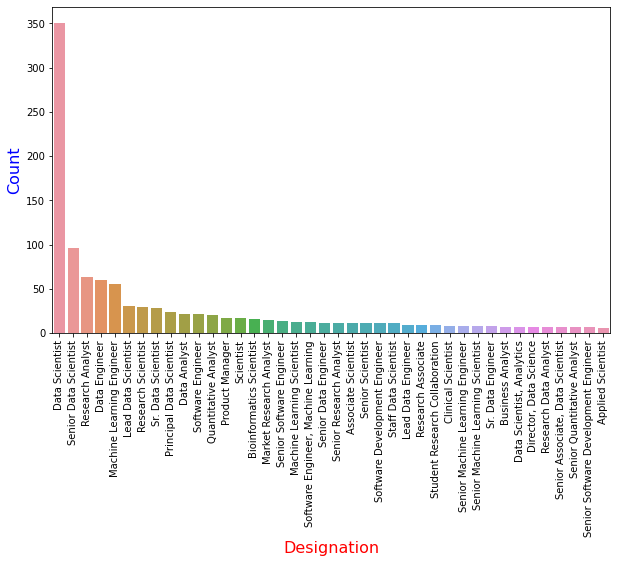

In [92]:
from matplotlib.pyplot import figure, show
import matplotlib.pyplot as plt
fig,a=plt.subplots(figsize=(10,6))   
sns.barplot(data=df.groupby('position').count().nlargest(40, 'company').reset_index(), x ='position', y='company')
a.set_xticklabels(df.groupby('position').count().nlargest(40, 'company').reset_index()['position'],rotation=90)   
a.set_ylabel('Count',fontsize=16,color='blue')
a.set_xlabel('Designation',fontsize=16,color='red')

*Positions by Companies *

1.under each company sort values of position column in albhabetical order and count each position under each company and then plot top 40 companies based on the number of position

2.x-axis correspond top 40 companies based on number of position

3.y-axis correspond to number of position

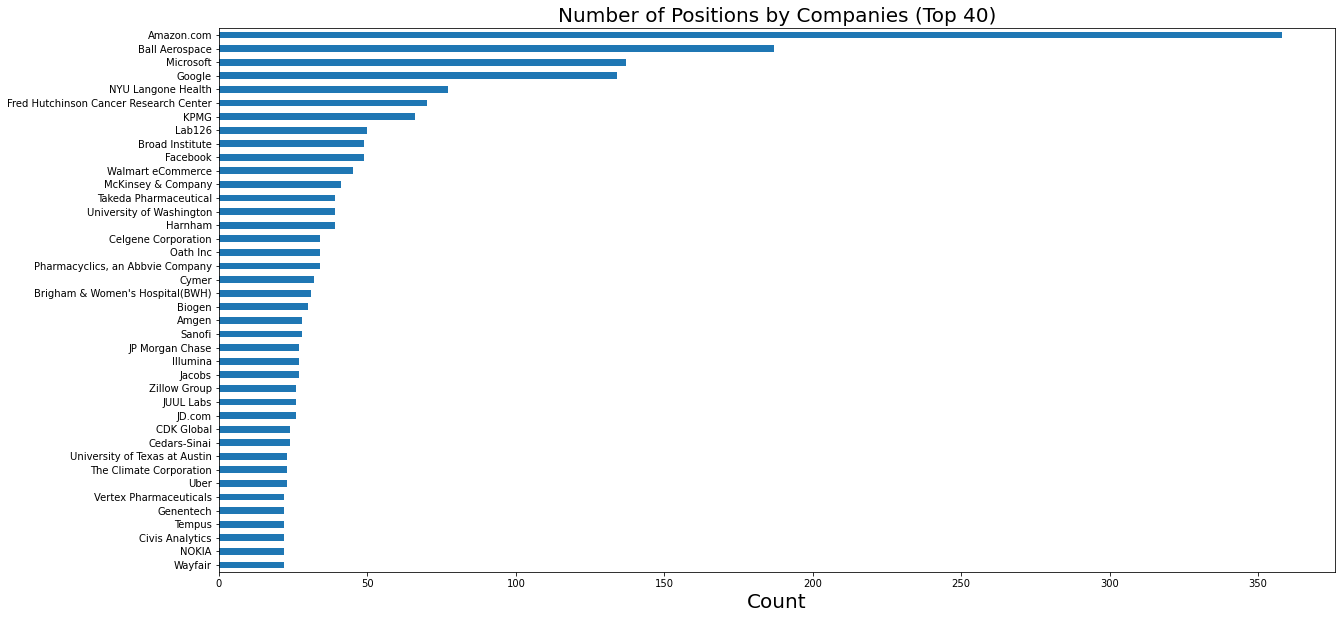

In [51]:
company = df.groupby(['company']).count().sort_values('position').tail(40)

company['position'].plot(kind='barh',figsize = (20,10))
plt.xlabel('Count', size = 20)
plt.ylabel('')
plt.yticks(size = 10)
plt.xticks(size = 10)
plt.title('Number of Positions by Companies (Top 40)', size = 20)
plt.show()

*Positions by Cities*

1.under each loaction sort values of position column in albhabetical order and count each position under each location and then plot top 40 companies based on the number of position

2.x-axis correspond top 40 location based on number of position

3.y-axis correspond to number of position

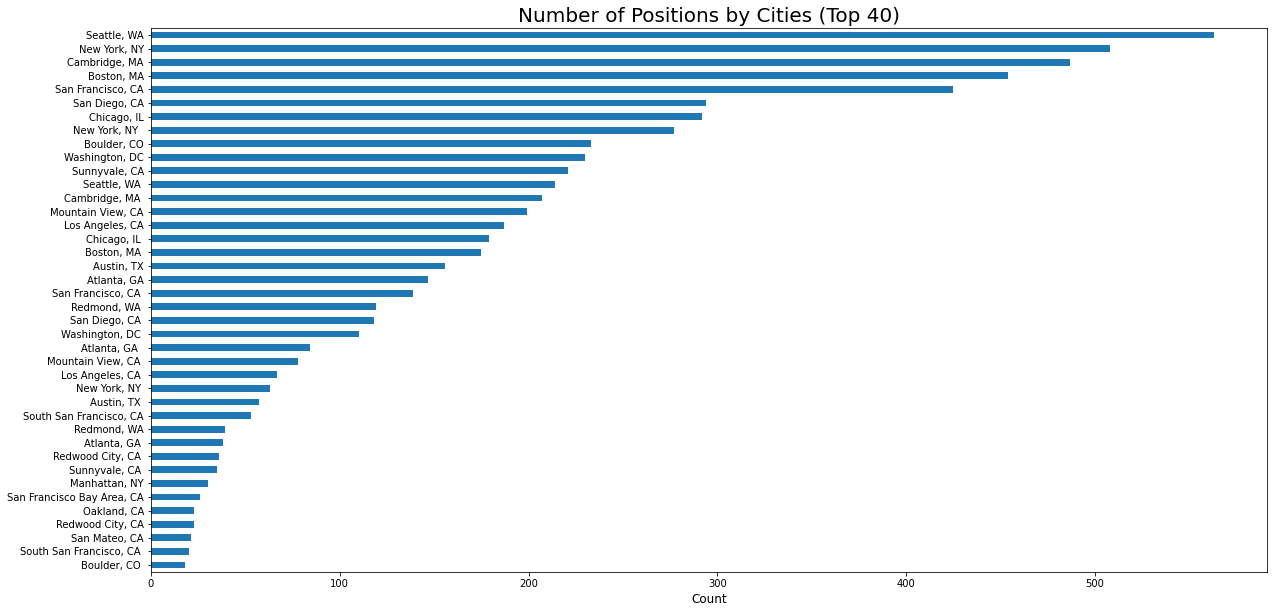

In [56]:
city = df.groupby(['location']).count().sort_values('position').tail(40)
city['position'].plot(kind='barh',figsize = (20,10))
plt.xlabel('Count', size = 12)
plt.ylabel('')
plt.yticks(size = 10)
plt.xticks(size = 10)
plt.title('Number of Positions by Cities (Top 40)', size = 20)
plt.show()


*Positions by States *

1.under each state sort values of position column in albhabetical order and count each position under each state and then plot top 40 companies based on the number of position

2.x-axis correspond top 40 states based on number of position

3.y-axis correspond to number of position

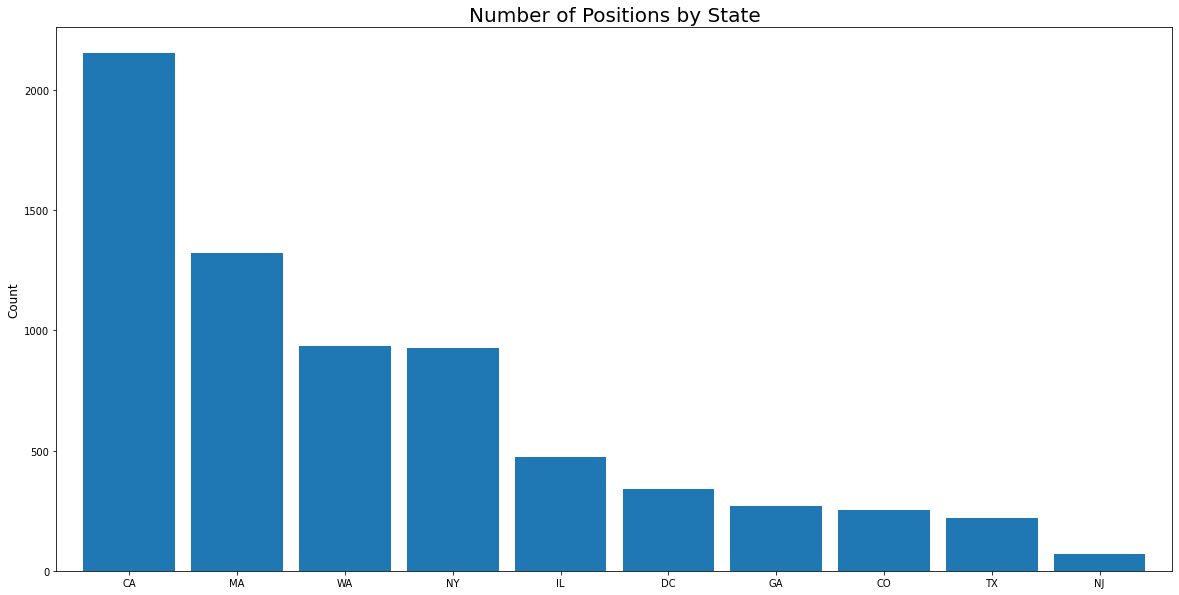

In [59]:
state = df.groupby('state').count().sort_values('position',ascending = False)
state['position'].plot(kind = 'bar',figsize = (20,10) ,width = 0.85)
plt.xlabel('')
plt.ylabel('Count',size = 12)
plt.title('Number of Positions by State', size = 20)
plt.yticks(size = 10)
plt.xticks(size = 10, rotation = 720)
plt.show()


group position into 5 types i.e.

1.all position contains scientist convert it into data scientist

2.all position contains Engineer,PRINCIPAL STATISTICAL  PROGRAMMER, PROGRAMMER, DEVELOPER convert it into Machine Learning Engineer

3.all position contains ANALYST, STATISTICIAN convert it into Data Analyst

4.all position contains MANAGER, CONSULTANT, DATA SCIENCE,  DIRECTOR convert it into Data Science Manager




In [97]:
# Group position name into 5 types
data = df.copy()
data['position']=[x.upper() for x in data['position']]
data.loc[data.position.str.contains("SCIENTIST"), 'position'] = 'Data Scientist'

data.loc[data.position.str.contains('ENGINEER'),'position']='Machine Learning Engineer'
data.loc[data.position.str.contains('PRINCIPAL STATISTICAL PROGRAMMER'),'position']='Machine Learning Engineer'
data.loc[data.position.str.contains('PROGRAMMER'),'position']='Machine Learning Engineer'
data.loc[data.position.str.contains('DEVELOPER'),'position']='Machine Learning Engineer'

data.loc[data.position.str.contains('ANALYST'), 'position'] = 'Data Analyst'
data.loc[data.position.str.contains('STATISTICIAN'), 'position'] = 'Data Analyst'

data.loc[data.position.str.contains('MANAGER'),'position']='Data Science Manager'
data.loc[data.position.str.contains('CONSULTANT'),'position']='Data Science Manager'
data.loc[data.position.str.contains('DATA SCIENCE'),'position']='Data Science Manager'
data.loc[data.position.str.contains('DIRECTOR'),'position']='Data Science Manager'

data.position=data[(data.position == 'Data Scientist') | (data.position == 'Data Analyst') | (data.position == 'Machine Learning Engineer') | (data.position == 'Data Science Manager')]
data.position=['Others' if x is np.nan else x for x in data.position]


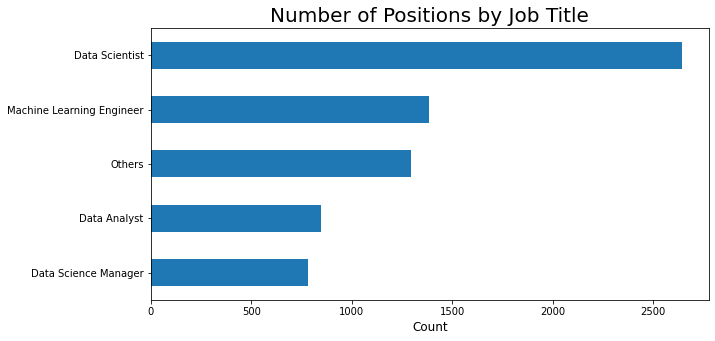

In [98]:
title = data.groupby(['position']).count().sort_values('company')

title['company'].plot(kind='barh',figsize = (10,5))
plt.xlabel('Count', size = 12)
plt.ylabel('')
plt.yticks(size = 10)
plt.xticks(size = 10)
plt.title('Number of Positions by Job Title', size = 20)
plt.show()


Text Cleaning and Prepration 

join the description column corresponding to same position

In [79]:
data = data.groupby('position').agg(lambda col: ' '.join(col))
data = data[['description']]

create function to clean the description text i.e. remove punctutations, unwanted character.

In [80]:
# Create a function to clean text data
def clean_text(text):
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text).lower() #remove punctutations
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n',' ',text)
    return text

apply clean_text function on description column

In [81]:
# Clean the text data and remove the job title 'Others'
clean = lambda x :clean_text(x)
df_clean = pd.DataFrame(data.description.apply(clean))
df_clean = df_clean[df_clean.index != 'Others'].copy()

1. tokenize the word in description column
2. then lemmatize the each word
3. at last join each word to form sentence as it was earlier

In [82]:
# Lemmentize the text data to improve analysis
lemmer = WordNetLemmatizer()
df_clean['description'] = df_clean.description.apply(lambda x: word_tokenize(x))
df_clean['description'] = df_clean.description.apply(lambda x : [lemmer.lemmatize(y) for y in x])
df_clean['description'] = df_clean.description.apply(lambda x: ' '.join(x))

remove stopwords from discription column 

stopwords are those which have used frequently in sentence and add no value like the, as, in, for etc.

In [83]:
# Add words that frequently appear in the descriptions but carry no value to the list of stop words
from sklearn.feature_extraction import text
extra_stopword = ['data','experience','work','team','will','skill','year','skills']
stop_words = text.ENGLISH_STOP_WORDS.union(extra_stopword)

Word Cloud 

Word clouds (also known as text clouds or tag clouds) work in a simple way: the more a specific word appears in a source of textual data (such as a speech, blog post, or database), the bigger and bolder it appears in the word cloud. A word cloud is a collection, or cluster, of words depicted in different sizes

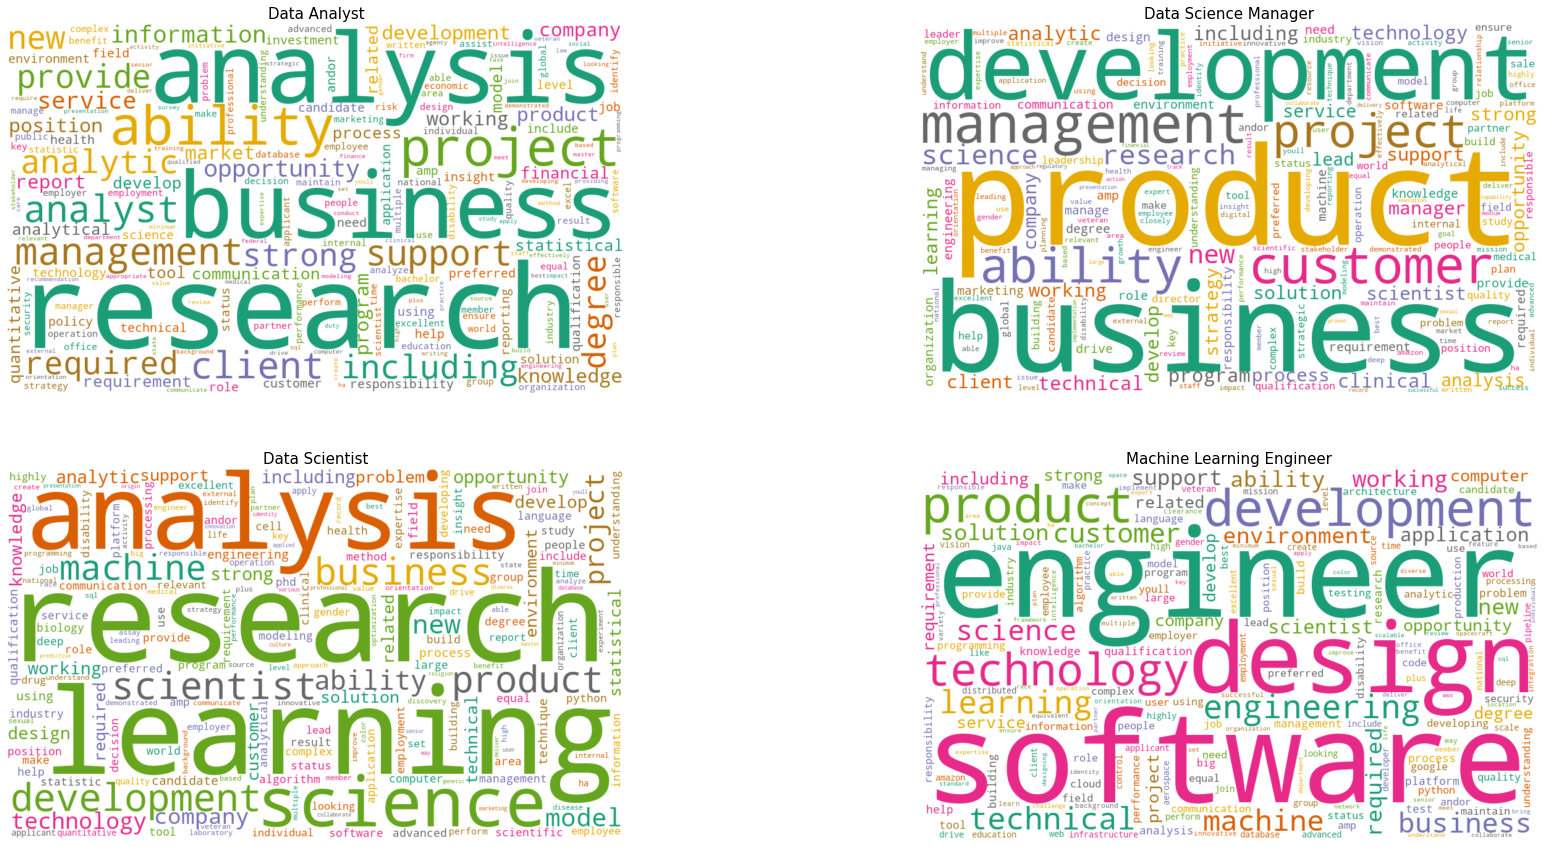

In [85]:
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
             random_state=42, collocations = False, width=1000, height=600)
i = 0
fig = plt.figure(figsize=(30,15))
for x in df_clean.description.index:
    wc.generate(df_clean.description[str(x)])
    
    i += 1
    fig.add_subplot(2, 2, i)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(str(x), size = 15)
plt.show()